In [9]:
%matplotlib inline
import pandas as pd
import warnings
import numpy as np

warnings.simplefilter('ignore')

data = pd.read_csv('data/bikeshare.csv')
X = data[[
    "season", "month", "hour", "holiday", "weekday", "workingday",
    "weather", "temp", "feelslike", "humidity", "windspeed"
]]
y = data["riders"]

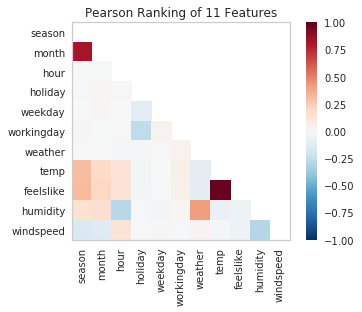

In [10]:
from yellowbrick.features import Rank2D

visualizer = Rank2D(algorithm="pearson")
visualizer.fit_transform(X)
visualizer.poof()

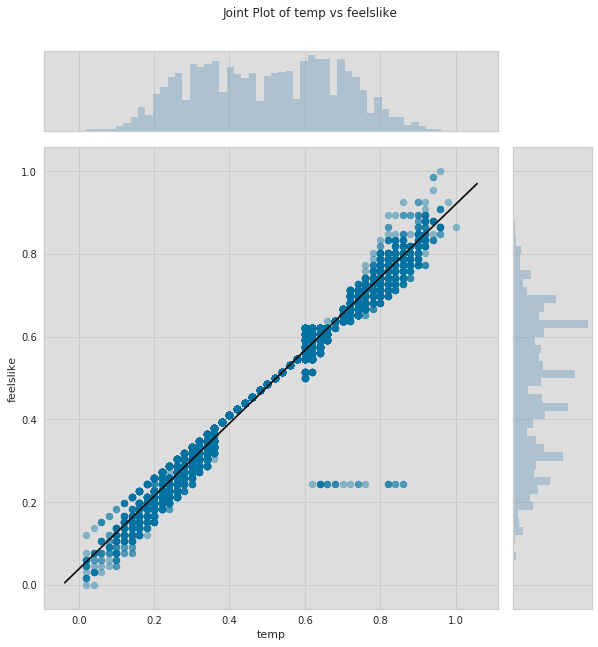

In [11]:
from yellowbrick.features import JointPlotVisualizer

visualizer = JointPlotVisualizer(feature='temp', target='feelslike')
visualizer.fit(X['temp'], X['feelslike'])
visualizer.poof()

/home/fonnescj/.local/lib/python3.4/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


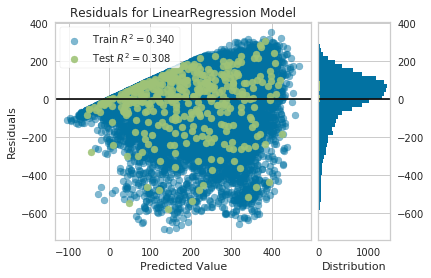

In [7]:
from yellowbrick.regressor import ResidualsPlot
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=400
)

visualizer = ResidualsPlot(LinearRegression())
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

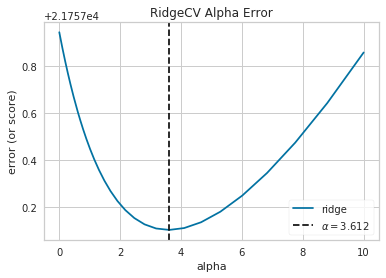

In [12]:
from sklearn.linear_model import RidgeCV
from yellowbrick.regressor import AlphaSelection

alphas = np.logspace(-10, 1, 200)
visualizer = AlphaSelection(RidgeCV(alphas=alphas))
visualizer.fit(X, y)
visualizer.poof()

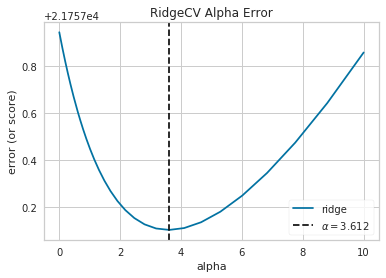

In [13]:
import numpy as np

from sklearn.linear_model import Lasso
from yellowbrick.regressor import AlphaSelection

alphas = np.logspace(-10, 1, 200)
visualizer = AlphaSelection(RidgeCV(alphas=alphas))
visualizer.fit(X, y)
visualizer.poof()

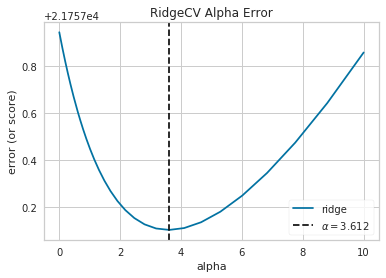

In [14]:
import numpy as np

from sklearn.linear_model import Ridge
from yellowbrick.regressor import AlphaSelection

alphas = np.logspace(-10, 1, 200)
visualizer = AlphaSelection(RidgeCV(alphas=alphas))
visualizer.fit(X, y)
visualizer.poof()

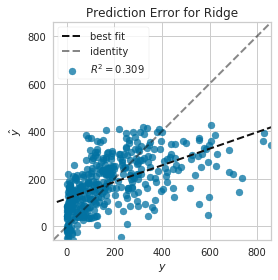

In [15]:
from sklearn.linear_model import Ridge
from yellowbrick.regressor import PredictionError

visualizer = PredictionError(Ridge(alpha=3.612))
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

In [106]:
import os
import pandas as pd

names = [
    'class',
    'cap-shape',
    'cap-surface',
    'cap-color'
]

dataset   = pd.read_csv('data/mushroom.csv')
dataset.columns = names
dataset.head()

,class,cap-shape,cap-surface,cap-color
0,edible,convex,smooth,yellow
1,edible,bell,smooth,white
2,poisonous,convex,scaly,white
3,edible,convex,smooth,gray
4,edible,convex,scaly,yellow


In [107]:
features = ['cap-shape', 'cap-surface', 'cap-color']
target   = ['class']

X = dataset[features]
y = dataset[target]

In [108]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import LabelEncoder, OneHotEncoder


class EncodeCategorical(BaseEstimator, TransformerMixin):
    """
    Encodes a specified list of columns or all columns if None.
    """

    def __init__(self, columns=None):
        self.columns  = [col for col in columns]
        self.encoders = None

    def fit(self, data, target=None):
        """
        Expects a data frame with named columns to encode.
        """
        # Encode all columns if columns is None
        if self.columns is None:
            self.columns = data.columns

        # Fit a label encoder for each column in the data frame
        self.encoders = {
            column: LabelEncoder().fit(data[column])
            for column in self.columns
        }
        return self

    def transform(self, data):
        """
        Uses the encoders to transform a data frame.
        """
        output = data.copy()
        for column, encoder in self.encoders.items():
            output[column] = encoder.transform(data[column])

        return output

In [109]:
from sklearn.metrics import brier_score_loss
from sklearn.pipeline import Pipeline


def model_selection(X, y, estimator, metric=brier_score_loss):
    """
    Test various estimators.
    """
    y = LabelEncoder().fit_transform(y.values.ravel())
    model = Pipeline([
         ('label_encoding', EncodeCategorical(X.keys())),
         ('one_hot_encoder', OneHotEncoder()),
         ('estimator', estimator)
    ])

    # Instantiate the classification model and visualizer
    model.fit(X, y)

    expected  = y
    predicted = model.predict(X)

    # Compute and return the F1 score (the harmonic mean of precision and recall)
    return (metric(expected, predicted))

In [110]:
from sklearn.svm import LinearSVC, NuSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression, SGDClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier

In [111]:
model_selection(X, y, LinearSVC())

0.3349747630185892

In [112]:
model_selection(X, y, NuSVC())

0.30333620583528254

In [113]:
model_selection(X, y, SVC())

0.32032500307768064

In [114]:
model_selection(X, y, SGDClassifier())

0.36402806844761787

In [115]:
model_selection(X, y, KNeighborsClassifier())

0.3118306044564816

In [116]:
model_selection(X, y, LogisticRegressionCV())

0.3349747630185892

In [117]:
model_selection(X, y, LogisticRegression())

0.3352209774713776

In [118]:
model_selection(X, y, BaggingClassifier())

0.28573187246091347

In [119]:
model_selection(X, y, ExtraTreesClassifier())

0.28474701464975993

In [120]:
model_selection(X, y, RandomForestClassifier())

0.28474701464975993

In [31]:
from sklearn.pipeline import Pipeline
from yellowbrick.classifier import ClassificationReport


def visual_model_selection(X, y, estimator):
    """
    Test various estimators.
    """
    y = LabelEncoder().fit_transform(y.values.ravel())
    model = Pipeline([
         ('label_encoding', EncodeCategorical(X.keys())),
         ('one_hot_encoder', OneHotEncoder()),
         ('estimator', estimator)
    ])

    # Instantiate the classification model and visualizer
    visualizer = ClassificationReport(model, classes=['edible', 'poisonous'])
    visualizer.fit(X, y)
    visualizer.score(X, y)
    visualizer.poof()

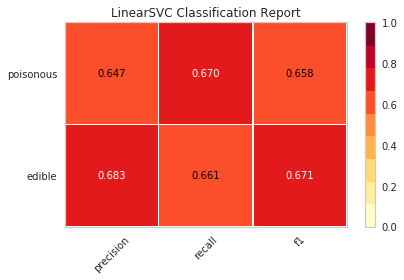

In [32]:
visual_model_selection(X, y, LinearSVC())

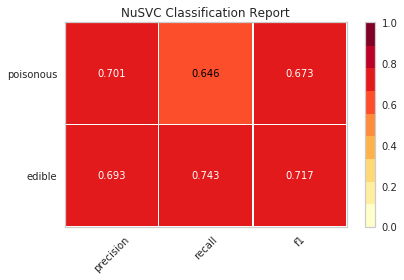

In [33]:
visual_model_selection(X, y, NuSVC())

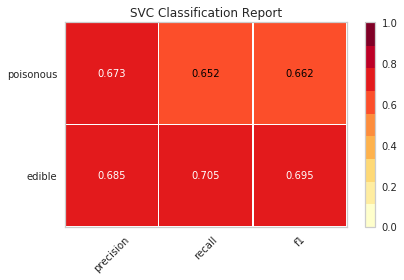

In [34]:
visual_model_selection(X, y, SVC())

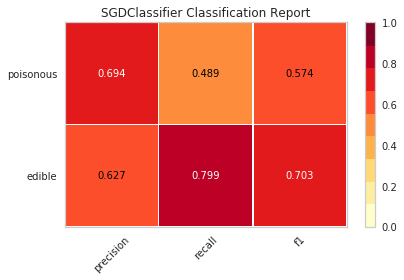

In [35]:
visual_model_selection(X, y, SGDClassifier())

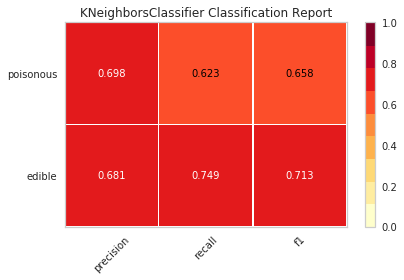

In [36]:
visual_model_selection(X, y, KNeighborsClassifier())

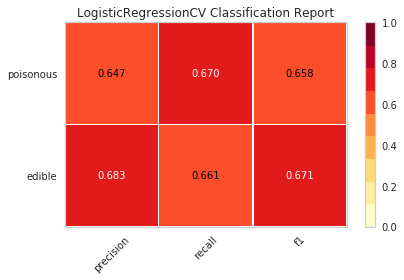

In [37]:
visual_model_selection(X, y, LogisticRegressionCV())

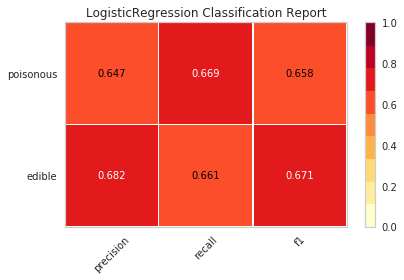

In [38]:
visual_model_selection(X, y, LogisticRegression())

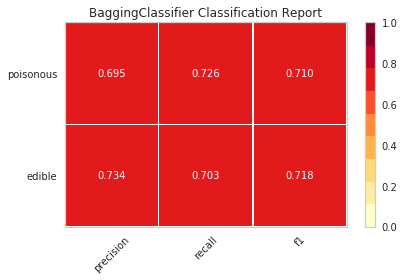

In [39]:
visual_model_selection(X, y, BaggingClassifier())

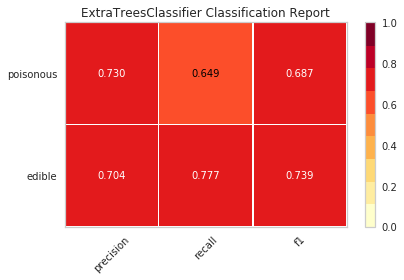

In [40]:
visual_model_selection(X, y, ExtraTreesClassifier())

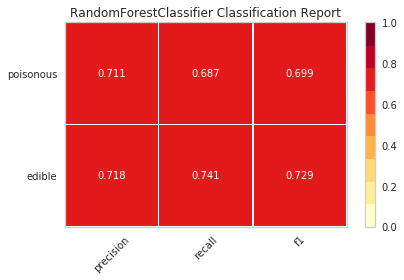

In [41]:
visual_model_selection(X, y, RandomForestClassifier())

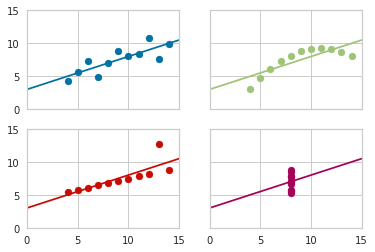

In [42]:
import yellowbrick as yb
import matplotlib.pyplot as plt

g = yb.anscombe()
plt.show()

In [43]:
from yellowbrick.features.rankd import *
from yellowbrick.features.radviz import RadViz
from yellowbrick.features.pcoords import ParallelCoordinates
from yellowbrick.features.jointplot import JointPlotVisualizer
from yellowbrick.features.pca import PCADecomposition
from yellowbrick.features.scatter import ScatterVisualizer

In [44]:
# Load the classification data set
data = pd.read_csv('data/occupancy.csv')

# Specify the features of interest and the classes of the target
features = ["temperature", "relative humidity", "light", "C02", "humidity"]
classes = ['unoccupied', 'occupied']

# Extract the numpy arrays from the data frame
X = data[features].as_matrix()
y = data.occupancy.as_matrix()

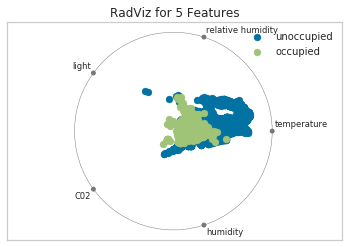

In [45]:
# Import the visualizer
from yellowbrick.features import RadViz

# Instantiate the visualizer
visualizer = RadViz(classes=classes, features=features)

visualizer.fit(X, y)      # Fit the data to the visualizer
visualizer.transform(X)   # Transform the data
visualizer.poof()         # Draw/show/poof the data

In [46]:
# Load the data set
data = pd.read_csv('data/credit.csv')

# Specify the features of interest
features = [
        'limit', 'sex', 'edu', 'married', 'age', 'apr_delay', 'may_delay',
        'jun_delay', 'jul_delay', 'aug_delay', 'sep_delay', 'apr_bill', 'may_bill',
        'jun_bill', 'jul_bill', 'aug_bill', 'sep_bill', 'apr_pay', 'may_pay', 'jun_pay',
        'jul_pay', 'aug_pay', 'sep_pay',
    ]

# Extract the numpy arrays from the data frame
X = data[features].as_matrix()
y = data.default.as_matrix()

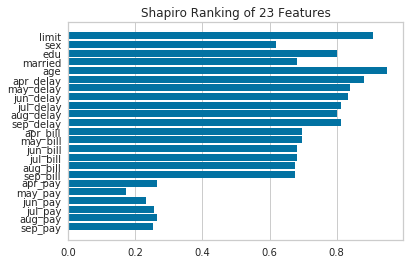

In [47]:
from yellowbrick.utils import is_dataframe
from yellowbrick.features.base import FeatureVisualizer
from yellowbrick.exceptions import YellowbrickValueError
from yellowbrick.style.colors import resolve_colors, get_color_cycle
from yellowbrick.features.rankd import Rank1D

# Instantiate the 1D visualizer with the Sharpiro ranking algorithm
visualizer = Rank1D(features=features, algorithm='shapiro')

visualizer.fit(X, y)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
visualizer.poof()                   # Draw/show/poof the data

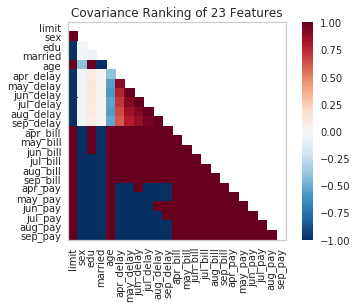

In [48]:
# Instantiate the visualizer with the Covariance ranking algorithm
visualizer = Rank2D(features=features, algorithm='covariance')

visualizer.fit(X, y)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
visualizer.poof()                   # Draw/show/poof the data

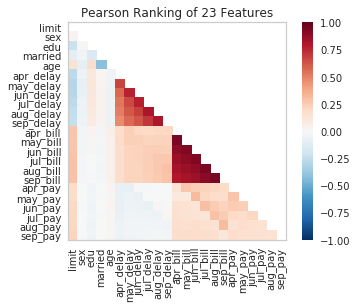

In [49]:
# Instantiate the visualizer with the Pearson ranking algorithm
visualizer = Rank2D(features=features, algorithm='pearson')

visualizer.fit(X, y)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
visualizer.poof()                   # Draw/show/poof the data

In [50]:
# Load the classification data set
data = pd.read_csv('data/occupancy.csv')

# Specify the features of interest and the classes of the target
features = ["temperature", "relative humidity", "light", "C02", "humidity"]
classes = ['unoccupied', 'occupied']

# Extract the numpy arrays from the data frame
X = data[features].as_matrix()
y = data.occupancy.as_matrix()

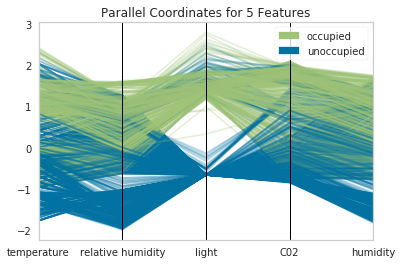

In [51]:
# Instantiate the visualizer
visualizer = ParallelCoordinates(classes=classes, features=features, normalize='standard', sample = 0.1)

visualizer.fit(X, y)      # Fit the data to the visualizer
visualizer.transform(X)   # Transform the data
visualizer.poof()         # Draw/show/poof the data

In [52]:
# Load the classification data set
data = pd.read_csv('data/credit.csv')

# Specify the features of interest
features = [
    'limit', 'sex', 'edu', 'married', 'age', 'apr_delay', 'may_delay',
    'jun_delay', 'jul_delay', 'aug_delay', 'sep_delay', 'apr_bill', 'may_bill',
    'jun_bill', 'jul_bill', 'aug_bill', 'sep_bill', 'apr_pay', 'may_pay', 'jun_pay',
    'jul_pay', 'aug_pay', 'sep_pay',
]

# Extract the numpy arrays from the data frame
X = data[features].as_matrix()
y = data.default.as_matrix()

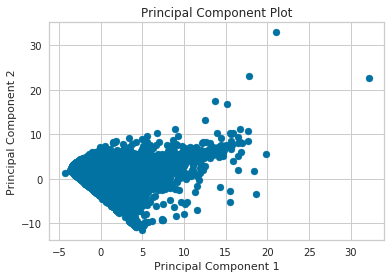

In [53]:
visualizer = PCADecomposition(scale=True, center=False, col=y)
visualizer.fit_transform(X,y)
visualizer.poof()

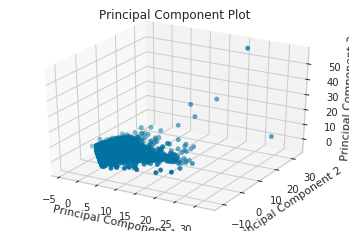

In [54]:
visualizer = PCADecomposition(scale=True, center=False, col=y, proj_dim=3)
visualizer.fit_transform(X,y)
visualizer.poof()

In [55]:
# Load the classification data set
data = pd.read_csv('data/occupancy.csv')

# Specify the features of interest and the classes of the target
features = ["temperature", "relative humidity", "light", "C02", "humidity"]
classes = ['unoccupied', 'occupied']

# Extract the numpy arrays from the data frame
X = data[features]
y = data.occupancy

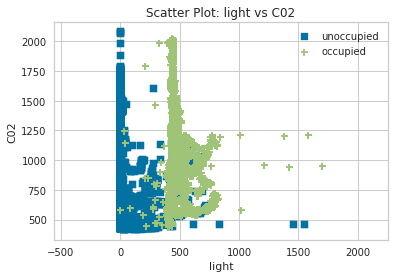

In [61]:
from yellowbrick.features.scatter import ScatterVisualizer

visualizer = ScatterVisualizer(x='light', y='C02', classes=classes)

visualizer.fit(X, y)
visualizer.transform(X)
visualizer.poof()

In [62]:
# Load the data
df = pd.read_csv('data/concrete.csv')
feature = 'cement'
target = 'strength'

# Get the X and y data from the DataFrame
X = df[feature]
y = df[target]

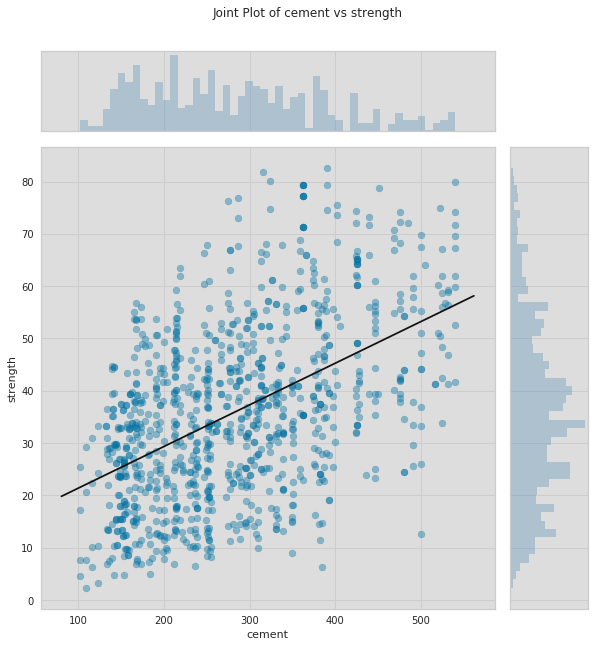

In [63]:
visualizer = JointPlotVisualizer(feature=feature, target=target)

visualizer.fit(X, y)
visualizer.poof()

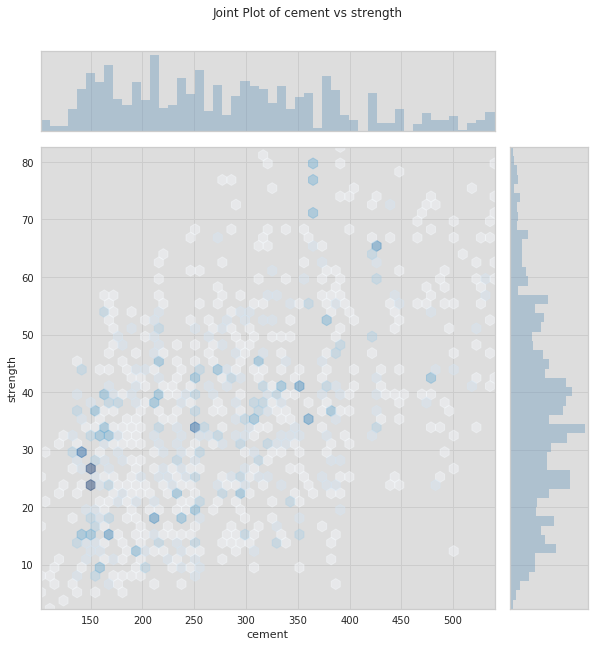

In [64]:
visualizer = JointPlotVisualizer(
    feature=feature, target=target, joint_plot='hex'
)

visualizer.fit(X, y)
visualizer.poof()

In [68]:
# Load the data
df = pd.read_csv('data/concrete.csv')
feature = 'cement'
target = 'strength'

# Get the X and y data from the DataFrame
X = df[feature]
y = df[target]

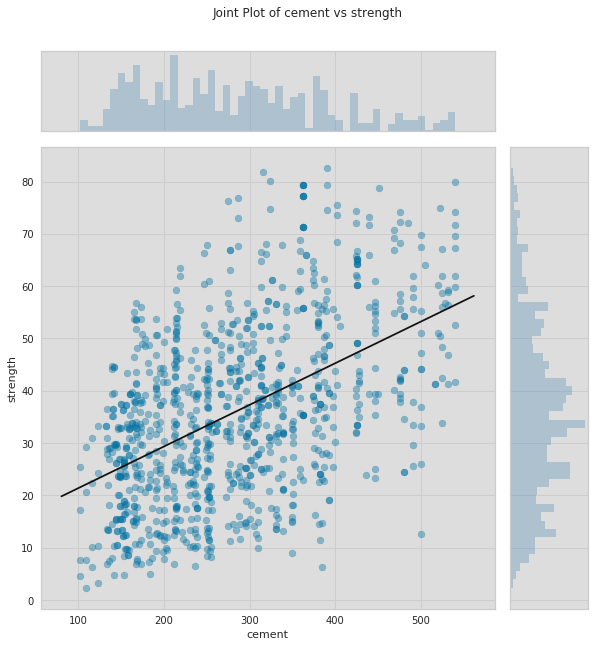

In [69]:
visualizer = JointPlotVisualizer(feature=feature, target=target)

visualizer.fit(X, y)
visualizer.poof()

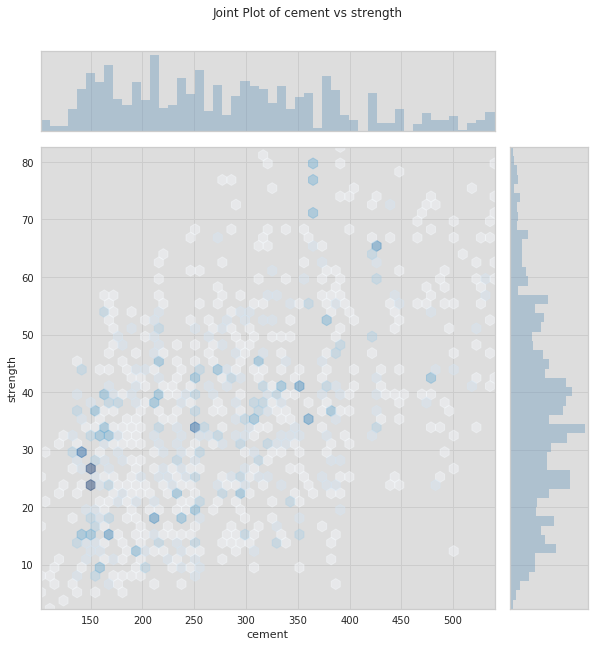

In [70]:
visualizer = JointPlotVisualizer(
    feature=feature, target=target, joint_plot='hex'
)

visualizer.fit(X, y)
visualizer.poof()

In [71]:
# Regression Evaluation Imports

from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split

from yellowbrick.regressor import PredictionError, ResidualsPlot
from yellowbrick.regressor.alphas import AlphaSelection

In [76]:
# Load the data
df = pd.read_csv('data/concrete.csv')
feature_names = ['cement', 'slag', 'ash', 'water', 'splast', 'coarse', 'fine', 'age']
target_name = 'strength'

# Get the X and y data from the DataFrame
X = df[feature_names].as_matrix()
y = df[target_name].as_matrix()

# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

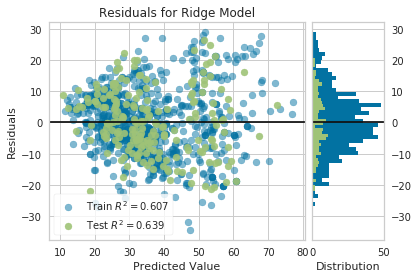

In [77]:
# Instantiate the linear model and visualizer
ridge = Ridge()
visualizer = ResidualsPlot(ridge)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data

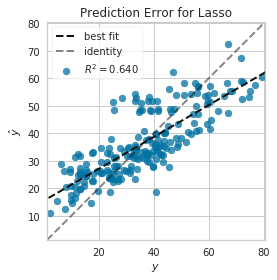

In [78]:
# Instantiate the linear model and visualizer
lasso = Lasso()
visualizer = PredictionError(lasso)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data

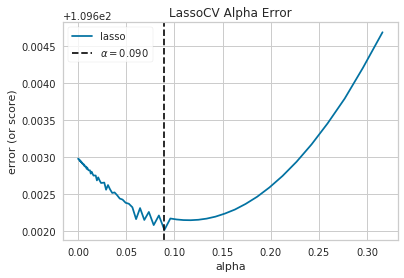

In [80]:
from sklearn.linear_model import LassoCV
# Create a list of alphas to cross-validate against
alphas = np.logspace(-12, -0.5, 400)

# Instantiate the linear model and visualizer
model = LassoCV(alphas=alphas)
visualizer = AlphaSelection(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
g = visualizer.poof()             # Draw/show/poof the data

# Classification Report

In [81]:
# Load the classification data set
data = pd.read_csv('data/occupancy.csv')

# Specify the features of interest and the classes of the target
features = ["temperature", "relative humidity", "light", "C02", "humidity"]
classes = ['unoccupied', 'occupied']

# Extract the numpy arrays from the data frame
X = data[features].as_matrix()
y = data.occupancy.as_matrix()

# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [82]:
from sklearn.svm import LinearSVC, NuSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression, SGDClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

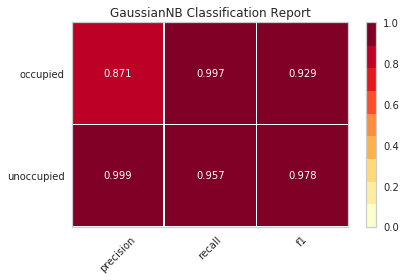

In [83]:
# Instantiate the classification model and visualizer
bayes = GaussianNB()
visualizer = ClassificationReport(bayes, classes=classes)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data

Example

In [84]:
#First do our imports
import yellowbrick

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from yellowbrick.classifier import ConfusionMatrix

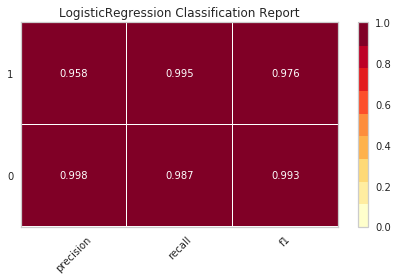

In [85]:
#Example
>>> from yellowbrick.classifier import ClassificationReport
>>> from sklearn.linear_model import LogisticRegression
>>> viz = ClassificationReport(LogisticRegression())
>>> viz.fit(X_train, y_train)
>>> viz.score(X_test, y_test)
>>> viz.poof()

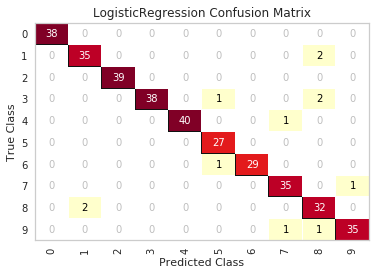

In [86]:
# We'll use the handwritten digits data set from scikit-learn.
# Each feature of this dataset is an 8x8 pixel image of a handwritten number.
# Digits.data converts these 64 pixels into a single array of features
digits = load_digits()
X = digits.data
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2, random_state=11)

model = LogisticRegression()

#The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(model, classes=[0,1,2,3,4,5,6,7,8,9])

#Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

#To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
#and then creates the confusion_matrix from scikit learn.
cm.score(X_test, y_test)

#How did we do?
cm.poof()

# Example

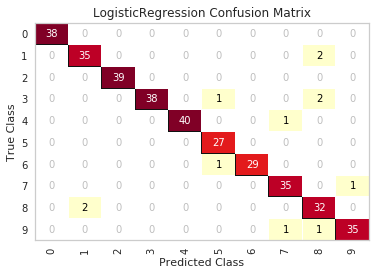

In [87]:
from yellowbrick.classifier import ConfusionMatrix
from sklearn.linear_model import LogisticRegression

viz = ConfusionMatrix(LogisticRegression())
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.poof()

In [88]:
# Load the classification data set
data = pd.read_csv('data/occupancy.csv')

# Specify the features of interest and the classes of the target
features = ["temperature", "relative humidity", "light", "C02", "humidity"]
classes = ['unoccupied', 'occupied']

# Extract the numpy arrays from the data frame
X = data[features].as_matrix()
y = data.occupancy.as_matrix()

# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

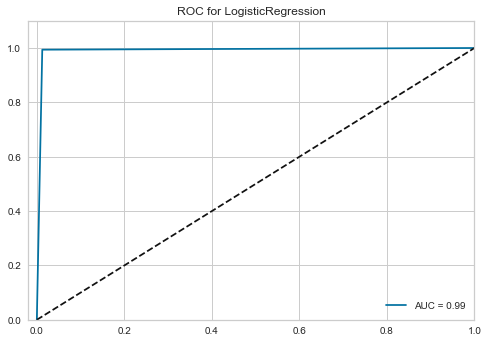

In [212]:
>>> from yellowbrick.classifier import ROCAUC
# Instantiate the classification model and visualizer
logistic = LogisticRegression()
visualizer = ROCAUC(logistic)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data

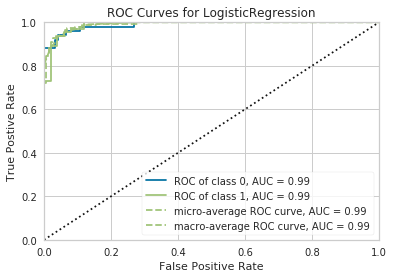

In [91]:
from sklearn.datasets import load_breast_cancer
from yellowbrick.classifier import ROCAUC

data = load_breast_cancer()
X = data['data']
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y)
viz = ROCAUC(LogisticRegression())
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.poof()

Class Balance 

In [92]:
# Load the classification data set
data = pd.read_csv('data/occupancy.csv')

# Specify the features of interest and the classes of the target
features = ["temperature", "relative humidity", "light", "C02", "humidity"]
classes = ['unoccupied', 'occupied']

# Extract the numpy arrays from the data frame
X = data[features].as_matrix()
y = data.occupancy.as_matrix()

# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

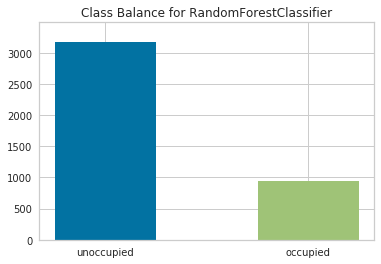

In [93]:
# Instantiate the classification model and visualizer
from yellowbrick.classifier import ClassBalance

forest = RandomForestClassifier()
visualizer = ClassBalance(forest, classes=classes)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data

In [94]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans


In [95]:
from sklearn.datasets.samples_generator import make_blobs

# Make 8 blobs dataset
X, y = make_blobs(centers=8)

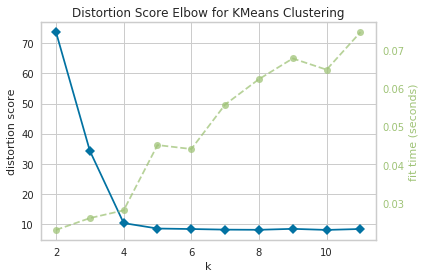

In [96]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

model = KElbowVisualizer(KMeans(), k=11)
model.fit(X)
model.poof()

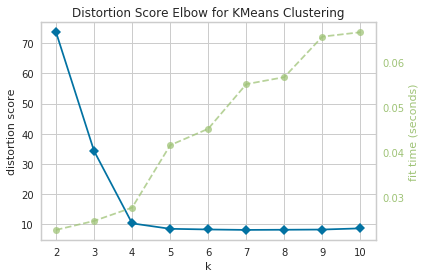

In [97]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer

model = KElbowVisualizer(KMeans(), k=10)
model.fit(X)
model.poof()

In [98]:
# Make 8 blobs dataset
X, y = make_blobs(centers=8)

In [99]:
from sklearn.cluster import MiniBatchKMeans

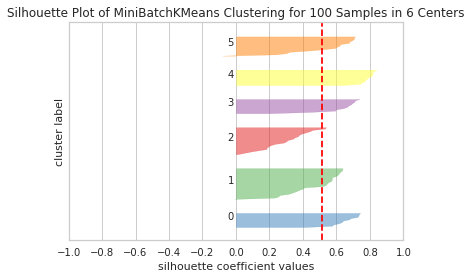

In [100]:
# Instantiate the clustering model and visualizer
model = MiniBatchKMeans(6)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(X) # Fit the training data to the visualizer
visualizer.poof() # Draw/show/poof the data